In [7]:
from google.colab import files
uploaded = files.upload()

Saving house_prices.csv to house_prices.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = pd.read_csv("house_prices.csv")
print(data.head())

   Area  Bedrooms  Age   Price
0  2600         3   20  550000
1  3000         4   15  565000
2  3200         4   18  610000
3  3600         3   30  595000
4  4000         5    8  760000


In [10]:
print(data.info())
print("\nMissing values in each column:")
print(data.isnull().sum())
print("\nSummary statistics:")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Area      9 non-null      int64
 1   Bedrooms  9 non-null      int64
 2   Age       9 non-null      int64
 3   Price     9 non-null      int64
dtypes: int64(4)
memory usage: 420.0 bytes
None

Missing values in each column:
Area        0
Bedrooms    0
Age         0
Price       0
dtype: int64

Summary statistics:
              Area  Bedrooms        Age          Price
count     9.000000  9.000000   9.000000       9.000000
mean   3211.111111  3.888889  13.777778  621666.666667
std     523.078494  0.781736   7.980880   82500.000000
min    2500.000000  3.000000   5.000000  540000.000000
25%    2800.000000  3.000000   8.000000  565000.000000
50%    3200.000000  4.000000  12.000000  595000.000000
75%    3600.000000  4.000000  18.000000  650000.000000
max    4000.000000  5.000000  30.000000  760000.000000


In [11]:
X = data[['Area', 'Bedrooms', 'Age']]
y = data['Price']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
print("Predicted prices:", y_pred)
print("Actual prices:", list(y_test))

Predicted prices: [665852.83526833 607042.54338111]
Actual prices: [650000, 565000]


In [15]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)
print("Model Accuracy (R² score):", accuracy)

Model Accuracy (R² score): 0.4411383141876599


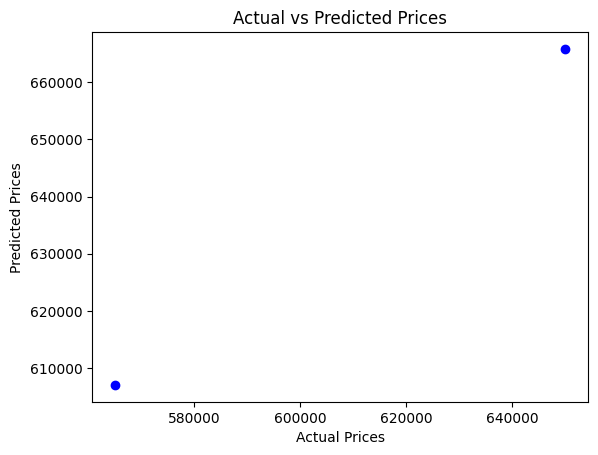

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [18]:
# Example: Area=3000, Bedrooms=4, Age=15
new_data = [[3000, 4, 15]]
predicted_price = model.predict(new_data)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 607042.5433811086


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
import joblib

joblib.dump(model, "house_price_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [20]:
loaded_model = joblib.load("house_price_model.pkl")

# Predict again with loaded model
loaded_pred = loaded_model.predict([[2500, 3, 10]])
print("Predicted price using loaded model:", loaded_pred[0])

Predicted price using loaded model: 533143.4202925964


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import zipfile
import numpy as np

comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison.head(10).to_csv("comparison_sample.csv", index=False)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.savefig("actual_vs_predicted.png", dpi=150, bbox_inches="tight")
plt.close()

with open("metrics.txt", "w") as f:
    mse = mean_squared_error(y_test, y_pred)   # Only MSE works in your sklearn
    rmse = np.sqrt(mse)                        # Take square root manually
    f.write(f"R2 (accuracy): {accuracy:.2f}\n")
    f.write(f"RMSE: {rmse:.2f}\n")

with zipfile.ZipFile("HousePrice_Submission.zip", "w") as zipf:
    zipf.write("house_price_model.pkl")
    zipf.write("comparison_sample.csv")
    zipf.write("actual_vs_predicted.png")
    zipf.write("metrics.txt")